# **TUGAS PRAKTIKUM III PEMBELAJARAN MESIN**

---
Nurida Larasati - 24060120120005


1. Clustering dataset Iris sesuai fitur 1, 2
2. Menentukan jumlah K pake elbow method utk clustering dataset Iris sesuai fitur 1, 2
3. Clustering dataset Iris sesuai fitur 2, 3
4. Menentukan jumlah K dengan elbow method
5. Evaluasi hasil clustering pake inertia + silhouette score (utk poin 1 & 3)
6. Visualisasi hasil clustering (utk poin 1 & 3)

**Import Dataset**

In [ ]:
# import libraries
%matplotlib inline
from copy import deepcopy
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

Library yang akan digunakan kali ini diantaranya adalah: pandas, numpy dan mathplot. Pandas adalah untuk memproses data yang meliputi pembersihan data, manipulasi data, hingga melakukan analisis data. NumPy untuk bekerja dengan array dan juga memiliki fungsi yang bekerja dalam domain aljabar linier, transformasi fourier, dan matriks. Matplotlib untuk melakukan visualisasi data seperti membuat plot grafik untuk satu sumbu atau lebih. Setiap sumbu memiliki sumbu horizontal (x) dan sumbu vertikal (y).


In [ ]:
# membuat data set
from sklearn.datasets import load_iris
iris = load_iris()
I = iris.data

# menampilkan dimensi dataset
print(I.shape)

# menampilkan 20 data teratas
I[:20]

(150, 4)


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3]])

Data yang digunakan adalah data iris yang dimuat langsung dari sklearn dengan import load_iris.

## 1. Clustering dataset Iris sesuai fitur 1, 2

In [ ]:
# fitur 1 and 2
I1 = I[:,0]
I2 = I[:,1]
I12 = np.array(list(zip(I1, I2)))

Menggunakan fitur 1 dan 2 yaitu sepal length dan sepal width untuk uji pertama. Selanjutnya dilakukan plot untuk melihat hasil.

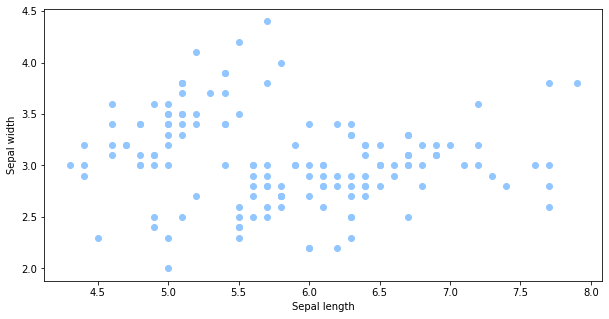

In [ ]:
# Plot the data
plt.style.use('seaborn-pastel')
plt.rcParams['figure.figsize'] = (10,5)
plt.scatter(I1, I2)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3)

# fitting input data
kmeans = kmeans.fit(I12)

# mendapatkan cluster labels
labels = kmeans.predict(I12)

# mendapatkan nilai centroid
C = kmeans.cluster_centers_

# mencetak nilai centroid
print(C)

[[6.81276596 3.07446809]
 [5.77358491 2.69245283]
 [5.006      3.428     ]]


melakukan clustering dengan K-Means clustering menggunakan library sklearn, menghasilkan nilai seperti pada hasil diatas. Dilanjutkan plot dari fitur.

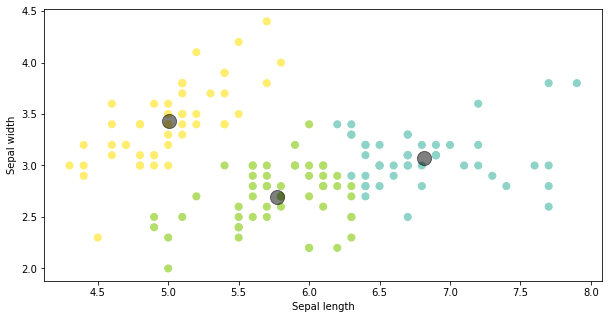

In [ ]:
# Plot the clusters
plt.scatter(I1, I2, c=labels, s=50, cmap='Set3')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

## 2. Elbow method clustering dataset Iris untuk fitur 1, 2

In [ ]:
SSE = []
K = range(1,10)
for k in K:
  kmeanModel = KMeans(n_clusters=k)
  kmeanModel.fit(I12)
  SSE.append(kmeanModel.inertia_)

Selanjutnya dilakukan penentuan K menggunakan metode elbow pada fitur 1 dan 2 atau sepal length dan sepal width. Serta dilakukan plot

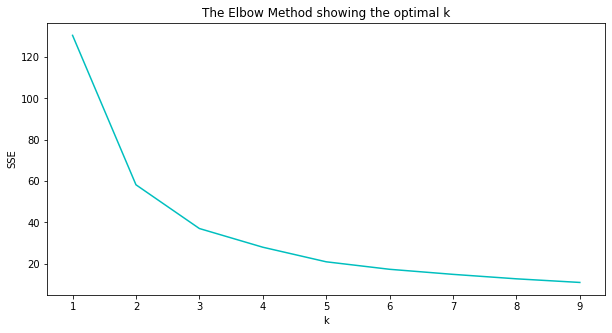

In [ ]:
#plot the elbow
plt.plot(K, SSE, 'c')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## 5. Evaluasi hasil clustering pake inertia + silhouette score

In [ ]:
for k in range (1, 10):
 # Menentukan jumlah cluster
 kmeans = KMeans(n_clusters=k, random_state=1)
 # Fitting input data
 kmeans = kmeans.fit(I12)
 # Mendapatkan cluster labels
 labels = kmeans.predict(I12)
 # Menghitung jumlahan jarak antara setiap sampel dengan cluster centroid-nya (SSE)
 interia = kmeans.inertia_
 print ("k:",k, " cost:", interia)
print ("")


k: 1  cost: 130.4752666666667
k: 2  cost: 58.204092789066735
k: 3  cost: 37.05070212765956
k: 4  cost: 27.9902120383037
k: 5  cost: 21.00466066066066
k: 6  cost: 17.438309523809522
k: 7  cost: 14.815831630102679
k: 8  cost: 12.751743561036669
k: 9  cost: 11.30144537346711



Dilakukan evaluasi hasil clustering dengan menggunakan beberapa kemungkinan nilai k. Setelahnya dilakukan evaluasi hasil cluster dengan menggunakan silhoutte coefficient

In [ ]:
from sklearn.metrics.cluster import silhouette_score
silhouette_score(I12, labels)

0.3933805520296448

## 6. Visualisasi hasil clustering

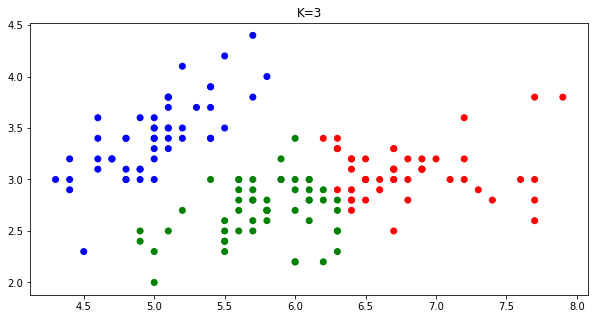

In [ ]:
y_pred = KMeans(n_clusters=3).fit_predict(I12)
plt.plot
LABEL_COLOR_MAP = {0 : 'r',
                   1 : 'g',
                   2 : 'b'
                   }
label_color = [LABEL_COLOR_MAP[l] for l in y_pred]
plt.scatter(I1,I2, c=label_color)
plt.title("K=3")
plt.show() 

visualisasi yang dihasilkan K 1-6 dan plot

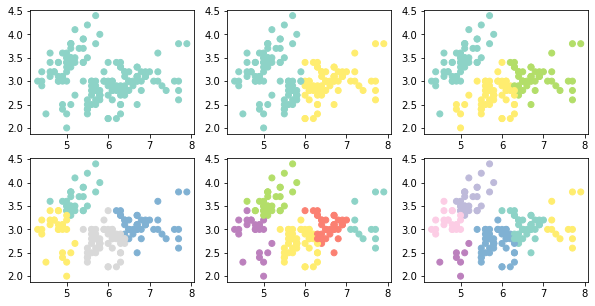

In [ ]:
figure,ax=plt.subplots(2,3)
K=range(1,7)
for k in K:
  if(k<4):
    row=0
    column=k-1
  else:
    row=1
    column=k-4
  kmeanModel = KMeans(n_clusters=k).fit(I12)
  y_pred=kmeanModel.fit_predict(I12)
  ax[row][column].scatter(I1,I2, c=y_pred,cmap='Set3')

plt.show()

## 3. Clustering dataset Iris sesuai fitur 2, 3

In [ ]:
# fitur 2 and 3
I2 = I[:,1]
I3 = I[:,2]
I23 = np.array(list(zip(I2, I3)))

Menggunakan fitur 2 dan 3 yaitu sepal width dan petal length untuk uji pertama. Selanjutnya dilakukan plot untuk melihat hasil.

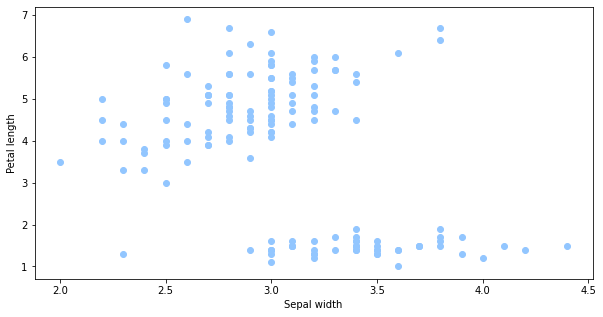

In [ ]:
# Plot the data
plt.style.use('seaborn-pastel')
plt.rcParams['figure.figsize'] = (10,5)
plt.scatter(I2, I3)
plt.xlabel('Sepal width')
plt.ylabel('Petal length')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=2)

# fitting input data
kmeans = kmeans.fit(I23)

# mendapatkan cluster labels
labels = kmeans.predict(I23)

# mendapatkan nilai centroid
C = kmeans.cluster_centers_

# mencetak nilai centroid
print(C)

[[2.87575758 4.92525253]
 [3.40980392 1.49215686]]


melakukan clustering dengan K-Means clustering menggunakan library sklearn, menghasilkan nilai seperti pada hasil diatas. Dilanjutkan plot dari fitur.

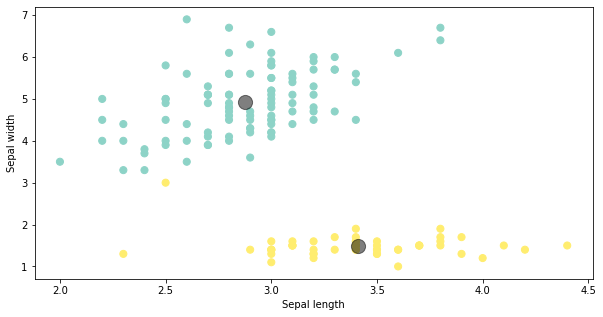

In [ ]:
# Plot the clusters
plt.scatter(I2, I3, c=labels, s=50, cmap='Set3')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

## 4. Elbow method clustering dataset Iris untuk fitur 2, 3

In [ ]:
SSE = []
K = range(1,10)
for k in K:
  kmeanModel = KMeans(n_clusters=k)
  kmeanModel.fit(I23)
  SSE.append(kmeanModel.inertia_)

Selanjutnya dilakukan penentuan K menggunakan metode elbow pada fitur 2 dan 3 atau sepal length dan sepal width. Serta dilakukan plot

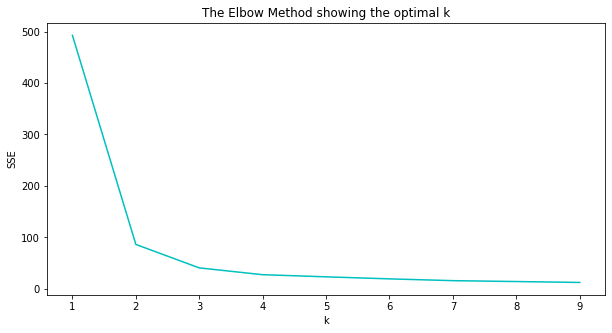

In [ ]:
#plot the elbow
plt.plot(K, SSE, 'c')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## 5. Evaluasi hasil clustering pake inertia + silhouette score

In [ ]:
for k in range (1, 10):
 # Menentukan jumlah cluster
 kmeans = KMeans(n_clusters=k, random_state=1)
 # Fitting input data
 kmeans = kmeans.fit(I23)
 # Mendapatkan cluster labels
 labels = kmeans.predict(I23)
 # Menghitung jumlahan jarak antara setiap sampel dengan cluster centroid-nya (SSE)
 interia = kmeans.inertia_
 print ("k:",k, " cost:", interia)
print ("")


k: 1  cost: 492.63233333333346
k: 2  cost: 86.31064765300059
k: 3  cost: 40.737074092207266
k: 4  cost: 27.48469523809524
k: 5  cost: 23.340085051338022
k: 6  cost: 19.280335839599
k: 7  cost: 15.863247083410169
k: 8  cost: 14.026659632553908
k: 9  cost: 12.550543128348735



Dilakukan evaluasi hasil clustering dengan menggunakan beberapa kemungkinan nilai k. Setelahnya dilakukan evaluasi hasil cluster dengan menggunakan silhoutte coefficient

In [ ]:
from sklearn.metrics.cluster import silhouette_score
silhouette_score(I23, labels)

0.38193892328517565

## 6. Visualisasi hasil clustering

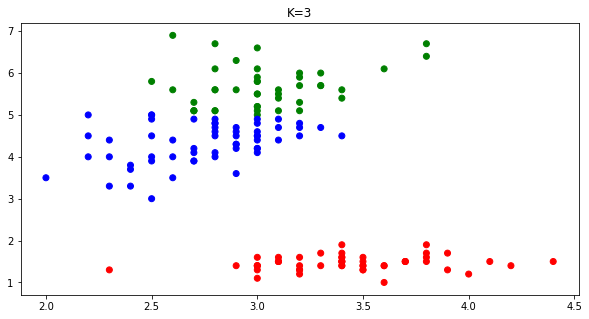

In [ ]:
y_pred = KMeans(n_clusters=3).fit_predict(I23)
plt.plot
LABEL_COLOR_MAP = {0 : 'r',
                   1 : 'g',
                   2 : 'b'
                   }
label_color = [LABEL_COLOR_MAP[l] for l in y_pred]
plt.scatter(I2,I3, c=label_color)
plt.title("K=3")
plt.show() 

visualisasi yang dihasilkan K 1-6 dan plot

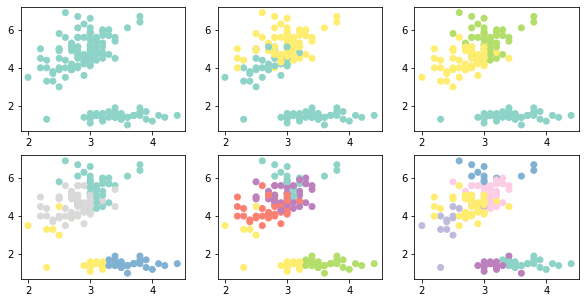

In [ ]:
figure,ax=plt.subplots(2,3)
K=range(1,7)
for k in K:
  if(k<4):
    row=0
    column=k-1
  else:
    row=1
    column=k-4
  kmeanModel = KMeans(n_clusters=k).fit(I12)
  y_pred=kmeanModel.fit_predict(I12)
  ax[row][column].scatter(I2,I3, c=y_pred,cmap='Set3')

plt.show()